In [2]:
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib as mpl
from copy import deepcopy,copy
from ipywidgets import IntProgress
from itertools import chain
from IPython.display import display
from datetime import datetime
import pickle
import os

states=['New York','Massachusetts','California','Florida','Washington','Texas']

import plots as p
from matplotlib import font_manager

font_dirs = ['Plots/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    print(font_file)
    font_manager.fontManager.addfont(font_file)
plt.rc('font', family='Arial')
plt.rcParams['font.family'] = 'Arial'

print(plt.rcParams)
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

/export/home/shared/Projects/City_flows/Plots/arialbd.ttf
/export/home/shared/Projects/City_flows/Plots/arial.ttf
_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: .15
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 24.0
axes.labelweight: normal
axes.linewidth: 1.25
axes.prop_cycle: cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5

['/usr/share/fonts/truetype/adf/BerenisADFPro-Regular.otf',
 '/usr/share/fonts/truetype/open-sans/OpenSans-Light.ttf',
 '/usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf',
 '/usr/share/fonts/truetype/gentium-basic/GenBasB.ttf',
 '/usr/share/fonts/truetype/adf/BerenisADFPro-Bold.otf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc',
 '/usr/share/fonts/truetype/noto/NotoSansKhmer-Regular.ttf',
 '/usr/share/fonts/truetype/tlwg/Kinnari.ttf',
 '/usr/share/fonts/truetype/noto/NotoSansTaiLe-Regular.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-LightOblique.ttf',
 '/usr/share/fonts/truetype/sinhala/lklug.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Regular.otf',
 '/usr/share/fonts/truetype/adf/GilliusADFNo2-Italic.otf',
 '/usr/share/fonts/opentype/stix/STIXSizeFourSym-Regular.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrebonum-regular.otf',
 '/usr/share/fonts/truetype/tlwg/Umpush.ttf',
 '/usr/share/fonts/truetype/lohit-gujarati/Lohit-Gujarati.t

In [3]:
name=open('./City2City_DataFrames/fold1_12kMCS/scatter_C_2023_01_17-01_48_08.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/scatter_C_2023_05_23-06_00_21.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
"""name=open('./repository/data/checkpoints/scatter_C_2023_05_25-07_18_16.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()"""
name=open('./repository/data/checkpoints/scatter_C_2023_06_29-02_45_19.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/scatter_C_2023_07_20-07_56_07.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()

In [4]:
def window_selection(a,b,lower,upper):
    a_new=[i for i,j in zip(a,b) if i>lower and i<=upper]
    b_new=[j for i,j in zip(a,b) if i>lower and i<=upper]
    return a_new,b_new
def common_part_of_commuters(values1, values2,lower,upper):
    values1,values2=window_selection(values1,values2,lower,upper)
    tot = np.sum(values1) + np.sum(values2)
    return 2.0 * np.sum(np.minimum(values1, values2)) / tot
def RMSE(real,predicted):
    #from sklearn.metrics import mean_squared_error
    #return mean_squared_error(real,predicted, squared=False)
    real,predicted=delete_nan(real,predicted)
    return np.sqrt(np.square(np.subtract(real,predicted)).mean())
def MRE(real,predicted):
    real,predicted=delete_nan(real,predicted)
    return np.array(list(np.abs((y-y1)/y1) for y,y1 in zip(predicted,real))).mean()
def MLogRatio(real,predicted):
    real,predicted=delete_nan(real,predicted)
    return np.array(list(np.abs(np.log(y1/y)) for y,y1 in zip(predicted,real))).mean()
def AbsErr(real,predicted,lower,upper):
    #from sklearn.metrics import mean_squared_error
    #return mean_squared_error(real,predicted, squared=False)
    real,predicted=window_selection(real,predicted,lower,upper)
    return np.abs(np.subtract(real,predicted))
def RE(real,predicted,lower,upper):
    real,predicted=window_selection(real,predicted,lower,upper)
    return [np.abs((y-y1)/y1) for y,y1 in zip(predicted,real)]
def LogRatio(real,predicted,lower,upper):
    real,predicted=window_selection(real,predicted,lower,upper)
    return [np.abs(np.log(y1/y)) for y,y1 in zip(predicted,real)]
metric_functions=[common_part_of_commuters,AbsErr,RE,LogRatio]

In [5]:
for key, item in scatter_models_C_final[states[0]].items():
    print(key,len(item))

Random Forest 5952
test 5952
Deep Gravity 5952
testDG 5952
Radiation 5952
Gravity pow 5952
Gravity exp 5952
BMS Plausible 5952
BMS Ensemble 5952
BMS-MuDF(ens,best) 5952
BMS Predictive 5952
BMS-MuDF(ens,best ae) 5952


[<matplotlib.lines.Line2D object at 0x7f3674b0f130>, <matplotlib.lines.Line2D object at 0x7f3674b8b070>, <matplotlib.lines.Line2D object at 0x7f36759dfb80>, <matplotlib.lines.Line2D object at 0x7f36759dfe50>, <matplotlib.lines.Line2D object at 0x7f3674950160>, <matplotlib.lines.Line2D object at 0x7f3674950430>, <matplotlib.lines.Line2D object at 0x7f3674950700>, <matplotlib.lines.Line2D object at 0x7f36749509d0>] ['Gravity pow', 'Gravity exp', 'Radiation', 'BMS Plausible', 'BMS Ensemble', 'BMS Predictive', 'Random Forest', 'Deep Gravity']


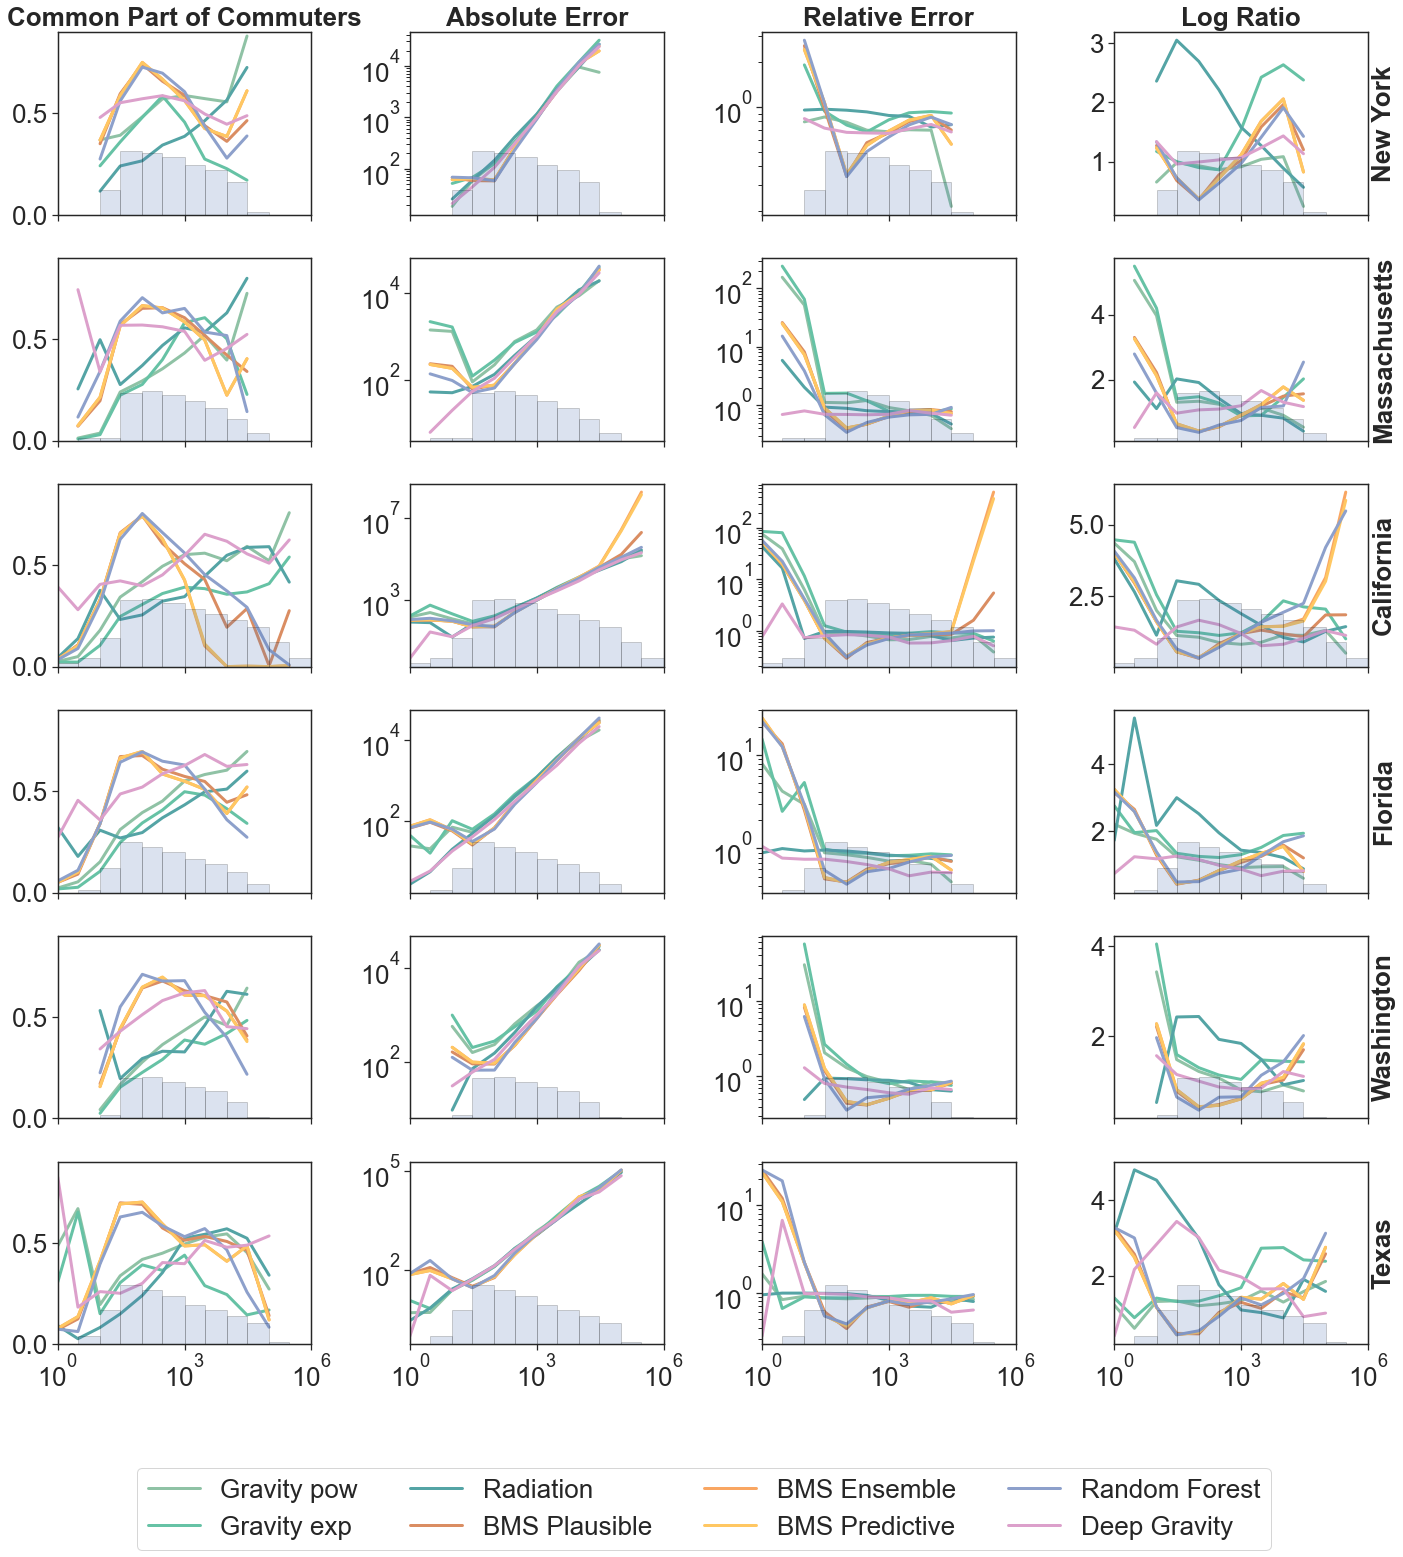

In [6]:
color_dict=p.color_dict
import matplotlib.cm as cm

SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
#print(_dict,df)
windows=[1,3,10,30,100,300,1e3,3e3,1e4,3e4,1e5,3e5,1e6,3e6]
models=['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity']
#models=['BMS Plausible','BMS Ensemble','BMS Predictive','Deep Gravity']

metrics=['CPC','AbsErr','RE','LogRatio']
size=(20, 20)
#print(metric,model)
colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



fig, axs = plt.subplots(len(states),len(metrics),figsize=size,sharex='col')
for i,m in enumerate(metrics):
    for j,s in enumerate(states):
        # Get de value for each model
        data=scatter_models_C_final[s]
        for l,model in enumerate(models):
            #print(m)
            res=[]
            num_points=[]
            for k in range(0,len(windows)-1):
                # Select flows in range
                #print(windows[k],windows[k+1])
                if l==0: num_points.append(len([point for point in data['test'] if windows[k]<point<windows[k+1]]))
                if model=='Deep Gravity':
                    aux=metric_functions[i](data['testDG'],data['Deep Gravity'],windows[k],windows[k+1])
                else:
                    aux=metric_functions[i](data['test'],data[model],windows[k],windows[k+1])
                    
                if m=='CPC':
                    res.append(aux)
                    if j==0:
                        axs[j,i].set_title('Common Part of Commuters', fontweight="bold")
                    axs[j,i].set_ylim([0,0.9])
                else:
                    res.append(np.median(aux))
            #print(res)
            axs[j,i].plot(windows[:len(res)],res, color=colors[l],label=model,lw=3.)
            axs[j,i].set_xscale('log')
            if i==len(metrics)-1:
                axs[j,i].set_ylabel(s, fontweight="bold")
                axs[j,i].yaxis.set_label_position("right")
                #axs[j,i].yaxis.tick_right()
            if j==0 and m=='RE':
                axs[j,i].set_title('Relative Error', fontweight="bold")
            elif j==0 and m=='LogRatio':
                axs[j,i].set_title('Log Ratio', fontweight="bold")
            elif j==0 and m=='AbsErr':
                axs[j,i].set_title('Absolute Error', fontweight="bold")
            if m=='AbsErr' or m=='RE':
                axs[j,i].set_yscale('log')
            axs[j,i].set_xlim([1,1e6])
            if l==0:
                #print(windows[:len(res)], num_points, np.diff(windows[:len(res)]))
                #print(len(windows[:len(res)]), len(num_points), len(np.diff(windows[:len(res)+1])))
                tx = axs[j,i].twinx()
                tx.bar(windows[:len(res)], num_points, log=True,ec="k", align="edge", alpha=0.2, width=np.diff(windows[:len(res)+1]))
                tx.set_ylim([0,1e10])
                tx.set_xlim([1,1e6])
                tx.set_xticks([])
                tx.set_yticks([])

lines, labels = axs[0,0].get_legend_handles_labels()
print(lines, labels)
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc='lower center',ncol=4,bbox_to_anchor=(0.5,-0.1))                
fig.tight_layout()
fig.show()
fig.savefig('./Plots/week1_metrics_windows.pdf',bbox_inches='tight',dpi=300)

[<matplotlib.lines.Line2D object at 0x7f366bfcd610>, <matplotlib.lines.Line2D object at 0x7f366bde9d60>, <matplotlib.lines.Line2D object at 0x7f366be77340>, <matplotlib.lines.Line2D object at 0x7f366be77850>, <matplotlib.lines.Line2D object at 0x7f366be77d60>] ['Gravity pow', 'Radiation', 'BMS Plausible', 'Random Forest', 'Deep Gravity']


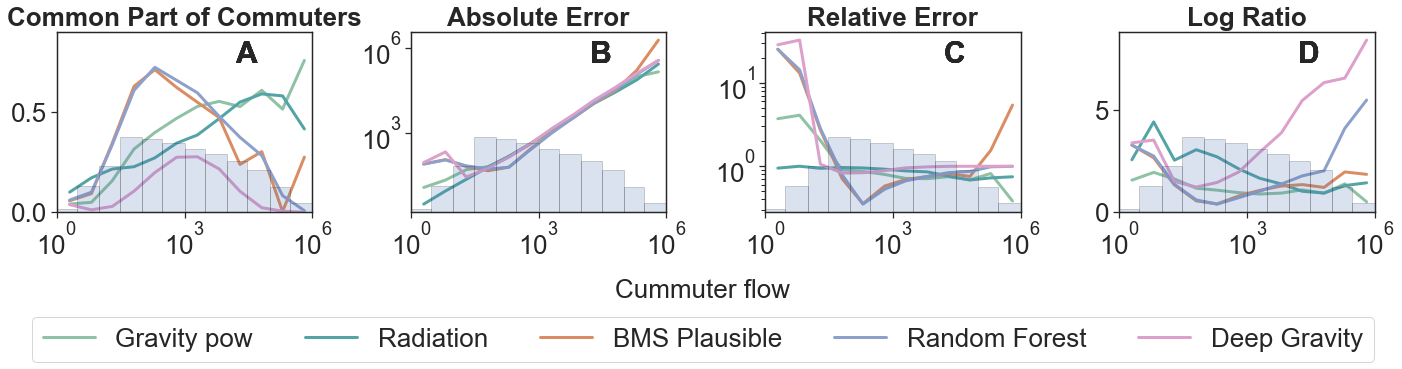

In [7]:
color_dict=p.color_dict
import matplotlib.cm as cm

SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
#print(_dict,df)
windows=np.array([1,3,10,30,100,300,1e3,3e3,1e4,3e4,1e5,3e5,1e6,3e6])
models=['Gravity pow','Radiation','BMS Plausible','Random Forest','Deep Gravity']
#models=['BMS Plausible','BMS Ensemble','BMS Predictive','Deep Gravity']

metrics=['CPC','AbsErr','RE','LogRatio']
size=(20, 20)
#print(metric,model)
colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

chars='ABCDE'

fig, axs = plt.subplots(1,len(metrics),figsize=(20,5))
for i,m in enumerate(metrics):
    for l,model in enumerate(models):
        #print(m)
        data={'test':[],model:[],'testDG':[],'Deep Gravity':[]}
        for j,s in enumerate(states):
            # Get de value for each model
            data['test']=[*data['test'],*scatter_models_C_final[s]['test']]
            data[model]=[*data[model],*scatter_models_C_final[s][model]]
            data['testDG']=[*data['testDG'],*scatter_models_C_final[s]['testDG']]
            data['Deep Gravity']=[*data['Deep Gravity'],*scatter_models_C_final[s]['Deep Gravity']]
        res=[]
        num_points=[]
        for k in range(0,len(windows)-1):
            # Select flows in range
            #print(windows[k],windows[k+1])
            if l==0: num_points.append(len([point for point in data['test'] if windows[k]<point<windows[k+1]]))
            if model=='Deep Gravity':
                aux=metric_functions[i](data['testDG'],data['Deep Gravity'],windows[k],windows[k+1])
            else:
                aux=metric_functions[i](data['test'],data[model],windows[k],windows[k+1])

            if m=='CPC':
                res.append(aux)
                axs[i].set_title('Common Part of Commuters', fontweight="bold")
                axs[i].set_ylim([0,0.9])
            else:
                res.append(np.median(aux))
        #print(windows[0:len(res)]+windows[1:len(res)+1]/2.)
        axs[i].text(.7, .95,chars[i], ha='left', va='top',size=30, transform=axs[i].transAxes, weight='bold')
        axs[i].plot((windows[0:len(res)]+windows[1:len(res)+1])/2.,res, color=colors[l],label=model,lw=3.)
        axs[i].set_xscale('log')
        axs[i].set_xlim([1,1e6])
        if m=='RE':
            axs[i].set_title('Relative Error', fontweight="bold")
        elif m=='LogRatio':
            axs[i].set_title('Log Ratio', fontweight="bold")
        elif m=='AbsErr':
            axs[i].set_title('Absolute Error', fontweight="bold")
        if m=='AbsErr' or m=='RE':
            axs[i].set_yscale('log')
        axs[i].set_xlim([1,1e6])
        if l==0:
            #print(windows[:len(res)], num_points, np.diff(windows[:len(res)]))
            #print(len(windows[:len(res)]), len(num_points), len(np.diff(windows[:len(res)+1])))
            tx = axs[i].twinx()
            tx.bar(windows[:len(res)], num_points, log=True,ec="k", align="edge", alpha=0.2, width=np.diff(windows[:len(res)+1]))
            tx.set_ylim([0,1e10])
            tx.set_xlim([1,1e6])
            tx.set_xticks([])
            tx.set_yticks([])
lines, labels = axs[0].get_legend_handles_labels()
print(lines, labels)
#lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc='lower center',ncol=len(models),bbox_to_anchor=(0.5, -0.1))
fig.supxlabel('Cummuter flow',x=0.5,y=0.1)
fig.tight_layout()
fig.show()
fig.savefig('./Plots/week1_metrics_merged.pdf',bbox_inches='tight',dpi=300)

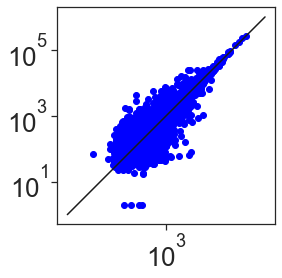

In [8]:
week1=pd.read_pickle('repository/data/NewYork/city_trips_features_2022_10_28-04_02_13.pkl')
week2=pd.read_pickle('repository/data/NewYork/city_trips_features_2023_04_26-08_27_34.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

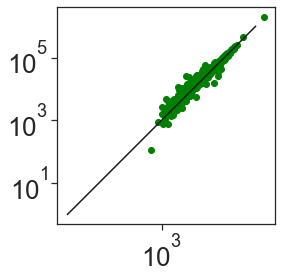

In [9]:
week1=pd.read_pickle('repository/data/NewYork/city_trips_features_2022_10_28-04_02_13.pkl')
week2=pd.read_pickle('repository/data/NewYork/city_trips_features_2023_04_26-08_27_34.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

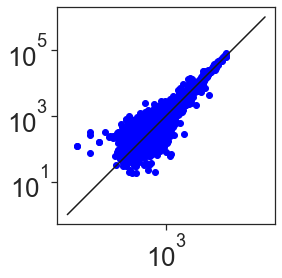

23392


In [10]:
week1=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2022_10_28-09_28_48.pkl')
week2=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2023_04_26-02_24_00.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
count=0
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            count+=1
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()
print(count)

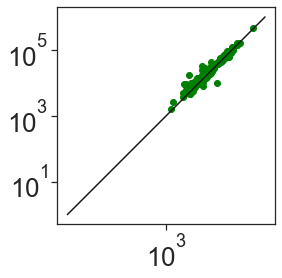

0


In [11]:
week1=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2022_10_28-09_28_48.pkl')
week2=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2023_04_26-02_24_00.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
count=0
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()
print(count)

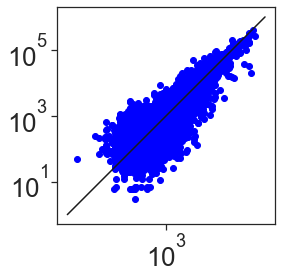

In [12]:
week1=pd.read_pickle('repository/data/California/city_trips_features_2022_10_30-03_06_27.pkl')
week2=pd.read_pickle('repository/data/California/city_trips_features_2023_04_28-10_15_22.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

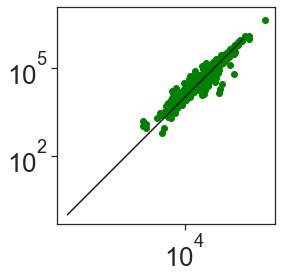

In [13]:
week1=pd.read_pickle('repository/data/California/city_trips_features_2022_10_30-03_06_27.pkl')
week2=pd.read_pickle('repository/data/California/city_trips_features_2023_04_28-10_15_22.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

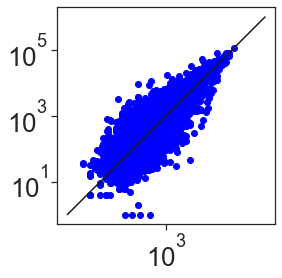

In [14]:
week1=pd.read_pickle('repository/data/Florida/city_trips_features_2022_10_31-12_54_59.pkl')
week2=pd.read_pickle('repository/data/Florida/city_trips_features_2023_04_29-08_50_13.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

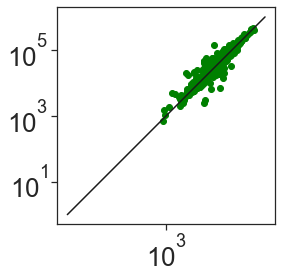

In [15]:
week1=pd.read_pickle('repository/data/Florida/city_trips_features_2022_10_31-12_54_59.pkl')
week2=pd.read_pickle('repository/data/Florida/city_trips_features_2023_04_29-08_50_13.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

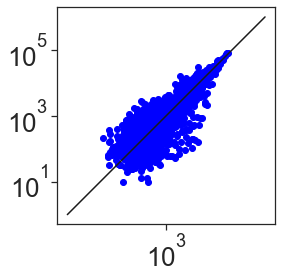

In [16]:
week1=pd.read_pickle('repository/data/Washington/city_trips_features_2022_10_31-07_50_13.pkl')
week2=pd.read_pickle('repository/data/Washington/city_trips_features_2023_04_29-04_33_02.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

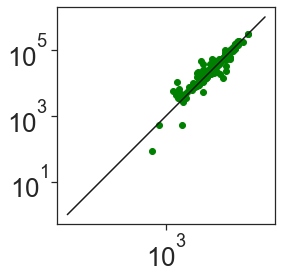

In [17]:
week1=pd.read_pickle('repository/data/Washington/city_trips_features_2022_10_31-07_50_13.pkl')
week2=pd.read_pickle('repository/data/Washington/city_trips_features_2023_04_29-04_33_02.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

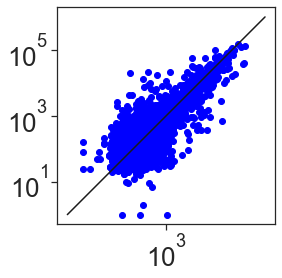

In [18]:
week1=pd.read_pickle('repository/data/Texas/city_trips_features_2022_11_01-04_52_48.pkl')
week2=pd.read_pickle('repository/data/Texas/city_trips_features_2023_04_30-05_26_25.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    for c2 in list(cities):
        try:
            a=week1[(week1.name_o==c1)&(week1.name_d==c2)].total_pop_flow1.values[0]
            b=week2[(week2.name_o==c1)&(week2.name_d==c2)].total_pop_flow2.values[0]
            plt.scatter(a,b,color='blue')
        except:
            continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

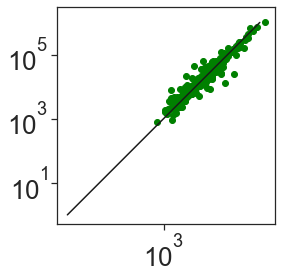

In [19]:
week1=pd.read_pickle('repository/data/Texas/city_trips_features_2022_11_01-04_52_48.pkl')
week2=pd.read_pickle('repository/data/Texas/city_trips_features_2023_04_30-05_26_25.pkl')

week1=week1.rename(columns={'total_pop_flow':'total_pop_flow1'})
week2=week2.rename(columns={'total_pop_flow':'total_pop_flow2'})

#print(week1.name_o.unique())
cities=set(list(week1.name_o.unique())+list(week1.name_d.unique())+list(week2.name_o.unique())+list(week2.name_d.unique()))
#print(cities)
for c1 in list(cities):
    try:
        a=week1[week1.name_o==c1].total_pop_flow1.sum()
        b=week2[week2.name_o==c1].total_pop_flow2.sum()
        plt.scatter(a,b,color='green')
    except:
        continue
plt.plot([1,1e6],[1,1e6],color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.show()

In [20]:
print(type(None))
import traceback
name=open('./repository/data/checkpoints/fold2_dataframes_2022_11_02-02_54_03.pkl', "rb")
test=pickle.load(name)
name.close()

name=open('./repository/data/checkpoints/scatter_C_2023_07_20-07_56_07.pkl', "rb")
scatter_models_C_final=pickle.load(name)
name.close()

test_DG_week2={state:0 for state in scatter_models_C_final.keys()}


scatter_models_C_final_mod={state:{model:[] for model in scatter_models_C_final[state].keys() } for state in scatter_models_C_final.keys()}
print(scatter_models_C_final_mod)

#
state='New York'
week2=pd.read_pickle('repository/data/NewYork/city_trips_features_2023_04_26-08_27_34.pkl')
#scatter_models_C_final_mod[state]['test']=[]
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
        #print(e,traceback.print_exc())
        #print(row[1],week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow)
print({model:len(scatter_models_C_final_mod[state][model]) for model in scatter_models_C_final_mod[state].keys()})
print(len(test_DG_week2[state]))
#print(scatter_models_C_final_mod[state]['test'])
#
state='Massachusetts'
week2=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2023_04_26-02_24_00.pkl')
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
state='California'
week2=pd.read_pickle('repository/data/California/city_trips_features_2023_04_28-10_15_22.pkl')
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
state='Florida'
week2=pd.read_pickle('repository/data/Florida/city_trips_features_2023_04_29-08_50_13.pkl')
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
state='Texas'
week2=pd.read_pickle('repository/data/Texas/city_trips_features_2023_04_30-05_26_25.pkl')
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
state='Washington'
week2=pd.read_pickle('repository/data/Washington/city_trips_features_2023_04_29-04_33_02.pkl')
for i,row in enumerate(test[state].iterrows()):
    try:
        #print(i)
        flow_second_week = week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow.values.tolist()[0]
        #print('f',flow_second_week)
        if flow_second_week>0:
            scatter_models_C_final_mod[state]['test'].append(flow_second_week)
            for model in [m for m in scatter_models_C_final[state].keys() if m not in ['test','testDG','Deep Gravity']]:
                try:
                    val=scatter_models_C_final[state][model].iloc[i]
                except Exception as e:
                    val=scatter_models_C_final[state][model][i]
                scatter_models_C_final_mod[state][model].append(val)
            if type(test_DG_week2[state])==type(0):
                test_DG_week2[state]=week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)]
            else:
                test_DG_week2[state]=test_DG_week2[state].append(week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)],ignore_index=True)
            
    except Exception as e:
        pass
with open('./repository/data/checkpoints/test_DG_week2.pkl', 'wb') as handle:
    pickle.dump(test_DG_week2, handle, protocol=pickle.HIGHEST_PROTOCOL)

<class 'NoneType'>
{'New York': {'Random Forest': [], 'test': [], 'Deep Gravity': [], 'testDG': [], 'Radiation': [], 'Gravity pow': [], 'Gravity exp': [], 'BMS Plausible': [], 'BMS Ensemble': [], 'BMS-MuDF(ens,best)': [], 'BMS Predictive': [], 'BMS-MuDF(ens,best ae)': []}, 'Massachusetts': {'Random Forest': [], 'test': [], 'Deep Gravity': [], 'testDG': [], 'Radiation': [], 'Gravity pow': [], 'Gravity exp': [], 'BMS Plausible': [], 'BMS Ensemble': [], 'BMS-MuDF(ens,best)': [], 'BMS Predictive': [], 'BMS-MuDF(ens,best ae)': []}, 'California': {'Random Forest': [], 'test': [], 'Deep Gravity': [], 'testDG': [], 'Radiation': [], 'Gravity pow': [], 'Gravity exp': [], 'BMS Plausible': [], 'BMS Ensemble': [], 'BMS-MuDF(ens,best)': [], 'BMS Predictive': [], 'BMS-MuDF(ens,best ae)': []}, 'Florida': {'Random Forest': [], 'test': [], 'Deep Gravity': [], 'testDG': [], 'Radiation': [], 'Gravity pow': [], 'Gravity exp': [], 'BMS Plausible': [], 'BMS Ensemble': [], 'BMS-MuDF(ens,best)': [], 'BMS Predi

In [21]:
#Deep gravity test
name=open('./repository/data/checkpoints/fold2_dataframes_2022_11_02-02_54_03.pkl', "rb")
test=pickle.load(name)
name.close()

test_second_week={}

#scatter_models_C_final_mod=deepcopy(scatter_models_C_final)
#
state='New York'
week2=pd.read_pickle('repository/data/NewYork/city_trips_features_2023_04_26-08_27_34.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_NewYork.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue
                #print(row[1],week2[(week2.name_o==row[1].name_o)&(week2.name_d==row[1].name_d)].total_pop_flow)
        #print(scatter_models_C_final_mod[state]['test'])
print(scatter_models_C_final_mod[state]['Deep Gravity'])
print(scatter_models_C_final_mod[state]['testDG'])
#
state='Massachusetts'
week2=pd.read_pickle('repository/data/Massachusetts/city_trips_features_2023_04_26-02_24_00.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_Massachusetts.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue
#
state='California'
week2=pd.read_pickle('repository/data/California/city_trips_features_2023_04_28-10_15_22.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_California.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue
#
state='Florida'
week2=pd.read_pickle('repository/data/Florida/city_trips_features_2023_04_29-08_50_13.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_Florida.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue
#
state='Texas'
week2=pd.read_pickle('repository/data/Texas/city_trips_features_2023_04_30-05_26_25.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_Texas.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue
#
state='Washington'
week2=pd.read_pickle('repository/data/Washington/city_trips_features_2023_04_29-04_33_02.pkl')
df=pd.read_pickle(f'/export/home/shared/Projects/LlDanus/Mobility/DadesOriol/results/fluxos_DG_Washington.pkl')
list_names=df.index.values
print(list_names)
scatter_models_C_final_mod[state]['testDG']=[]
scatter_models_C_final_mod[state]['Deep Gravity']=[]
for i in list_names:
    for k,j in enumerate(list_names):
        if ((test[state].name_o==i)&(test[state].name_d==j)).any():
            try:
                a=df[df.index==i].target.values[0][k]
                b=week2[(week2.name_o==i)&(week2.name_d==j)].total_pop_flow.values.tolist()[0]
                #print(a,b)
                if a>0. and b>0.:
                    scatter_models_C_final_mod[state]['Deep Gravity'].append(a)
                    scatter_models_C_final_mod[state]['testDG'].append(b)
            except Exception as e:
                #print(e)
                continue

['Altamont' 'Lockport' 'Head of the Harbor' 'Islandia' 'Lake Grove'
 'Ogdensburg' 'Cazenovia' 'Geneva' 'Hudson Falls' 'Lindenhurst'
 'Lloyd Harbor' 'Old Field' 'Utica' 'Dolgeville' 'Gloversville'
 'Johnstown' 'Wilson' 'Pulaski' 'Saratoga Springs' 'Nassau' 'Albany'
 'Mamaroneck' 'Troy' 'Highland Falls' 'Potsdam' 'Palmyra' 'Pelham Manor'
 'Tarrytown' 'East Rochester' 'Honeoye Falls' 'Great Neck Plaza'
 'Hempstead' 'Hewlett Bay Park' 'Island Park' 'Bayville' 'Spencerport'
 'Hillburn' 'Piermont' 'South Nyack' 'Malone' 'North Tonawanda' 'Scotia'
 'Brockport' 'Airmont' 'Montebello' 'Herkimer' 'Old Westbury'
 'Port Washington North' 'Woodbury' 'Marcellus' 'Sands Point' 'Kingston'
 'Sea Cliff' 'Valley Stream' 'Williston Park' 'Ithaca' 'Dunkirk' 'Cohoes'
 'Lackawanna' 'East Williston' 'Oyster Bay Cove' 'Amityville' 'Lawrence'
 'Munsey Park' 'Muttontown' 'Brightwaters' 'Watervliet' 'Ballston Spa'
 'Corinth' 'Mechanicville' 'Port Chester' 'Scarsdale' 'Yonkers' 'Endicott'
 'Watertown' 'Stillwater'

['Anaheim' 'Cypress' 'Orange' 'San Juan Capistrano' 'Santa Ana'
 'Westminster' 'Stockton' 'Apple Valley' 'Redding' 'Shasta Lake'
 'Victorville' 'Bakersfield' 'Brentwood' 'San Rafael' 'Ukiah' 'Coronado'
 'Escondido' 'Imperial Beach' 'Delano' 'Sand City' 'Anderson' 'Oakland'
 'Lemon Grove' 'San Diego' 'Sausalito' 'Orinda' 'San Pablo' 'Loma Linda'
 'Bradbury' 'Ontario' 'Windsor' 'Bishop' 'La Mesa' 'Oceanside' 'Poway'
 'San Marcos' 'Berkeley' 'Dublin' 'Vista' 'Union City' 'Napa' 'King City'
 'Cloverdale' 'Palos Verdes Estates' 'Santa Fe Springs' 'Calabasas'
 'Rolling Hills Estates' 'Dixon' 'Sonoma' 'Los Gatos' 'Gilroy' 'Saratoga'
 'Baldwin Park' 'Beverly Hills' 'Glendale' 'La Puente' 'Los Angeles'
 'Temple City' 'Rancho Cucamonga' 'Campbell' 'Cupertino' 'Palo Alto'
 'Port Hueneme' 'Colton' 'Grand Terrace' 'Loomis' 'Willits' 'Ross'
 'San Anselmo' 'Mill Valley' 'Brisbane' 'Colma' 'Hillsborough' 'Pacifica'
 'Belvedere' 'Ceres' 'San Francisco' 'Oakdale' 'Pacific Grove' 'San Mateo'
 'Lawndale' 

['Clarkston' 'Walla Walla' 'Tumwater' 'Pasco' 'Centralia' 'Chehalis'
 'Everett' 'Lacey' 'Mill Creek' 'Monroe' 'Mukilteo' 'Seattle'
 'Woodinville' 'Bainbridge Island' 'Mercer Island' 'Normandy Park'
 'Pullman' 'Pacific' 'Burien' 'Lake Forest Park' 'Lynden' 'Chewelah'
 'Colville' 'East Wenatchee' 'Bonney Lake' 'Anacortes' 'Edgewood'
 'Gig Harbor' 'Tacoma' 'University Place' 'Fircrest' 'Orting' 'Steilacoom'
 'Long Beach' 'Bellevue' 'Federal Way' 'Issaquah' 'Kenmore' 'Algona'
 'Kent' 'Medina' 'Cheney' 'Bellingham' 'Arlington' 'Toppenish' 'Snohomish'
 'Sumner' 'Bothell' 'Lake Stevens' 'Lynnwood' 'Grandview' 'Longview'
 'Battle Ground' 'Camas' 'Bangor Base' 'Bothell West' 'Boulevard Park'
 'Brush Prairie' 'Camano' 'Central Park' 'Clearview' 'Cottage Lake'
 'Country Homes' 'Duluth' 'East Port Orchard' 'East Renton Highlands'
 'Elk Plain' 'Esperance' 'Finley' 'Five Corners' 'Fobes Hill'
 'Fords Prairie' 'Fort Lewis' 'Hobart' 'Hockinson' 'Lake Holm'
 'Lakeland South' 'Lake Shore' 'Lake Stickney

In [22]:
res={}
files={'New York':""}
#list_week1=pd.read_pickle('repository/data/checkpoints/list_states_dataframes_2022_11_02-02_53_58.pkl')
#list_week2=pd.read_pickle('repository/DadesOriol/data_week2/list_states_week2.pkl')
#print(list_week1[0][list_week1[0].duplicated(keep=False)])
#display(list_week1[0].head(20))
#display(list_week2[0].head(20))
for i,key in enumerate(states):
    #print('dp',len(list_week1[i][list_week1[i].duplicated(keep=False)]))
    #print('dp',len(list_week2[i][list_week2[i].duplicated(keep=False)]))

    if key=='New York':
        name='NewYork'
    else:
        name=key
    #df1=pd.read_pickle(f'./repository/DadesOriol/results/fluxos_DG_{name}.pkl')
    #display(df1)
    df=pd.read_pickle(f'./repository/DadesOriol/results_week2/fluxos_DG_{name}.pkl')
    #display(df)
    """print(test_list_dataframes[key].head())
    list_cities_DG=df.index.to_list()
    list_cities_test=np.unique(test_list_dataframes[key].name_o.to_list())
    print(list_cities_test)

    for c1 in list_cities_DG:
        if c1 not in list_cities_test:
            print(c1)
    q
    print(df.head())

    test_labels=[]
    predictions=[]
    for row in test_list_dataframes[key].iterrows():
        destinations_DG=pd.DataFrame({'dg_d':list_cities_DG,'data':df[df.index==row[1].name_o].data.values[0],
                                      'target':df[df.index==row[1].name_o].target.values[0]})
        test_labels.append(destinations_DG[destinations_DG.dg_d==row[1].name_d].data.values[0])
        predictions.append(destinations_DG[destinations_DG.dg_d==row[1].name_d].target.values[0])"""


    test_labels=[]
    predictions=[]
    for row in df.iterrows():
        #print(row[1])
        #origin=row[1].name
        #out_week1=np.sum(list_week1[i][list_week1[i].name_o==origin].total_pop_flow.values)
        #out_week2=np.sum(list_week2[i][list_week2[i].name_o==origin].total_pop_flow.values)
        #print(out_week1,out_week2)
        for l,m in zip(row[1].data,row[1].target):
            if l>0.0:
                #if l==0:print(l,m);
                #print()
                test_labels.append(l)
                predictions.append(m*(out_week1/out_week2))
    """print(len(test_labels),test_labels[0:10])
    print(len(predictions),predictions[0:10])
    print(test_list_dataframes[key][test_list_dataframes[key].name_o=='Islandia'])
    q"""
    print(max(test_labels),max(predictions))
    #if log_flows==True:
    #    predictions=np.exp(predictions)
    print(len(test_labels),len(predictions))
    print(len(scatter_models_C_final_mod[key]['test']))
    scatter_models_C_final_mod[key]['Deep Gravity']=deepcopy(predictions)
    scatter_models_C_final_mod[key]['testDG']=deepcopy(test_labels)

NameError: name 'out_week1' is not defined

name=open('./repository/data/checkpoints/scatter_C_2023_05_25-07_18_16.pkl', "rb")
scatter_models_C_final_mod=pickle.load(name)
name.close()
name=open('./repository/data/checkpoints/scatter_C_2023_05_23-06_00_21.pkl', "rb")
scatter_models_C_final_mod=pickle.load(name)
name.close()

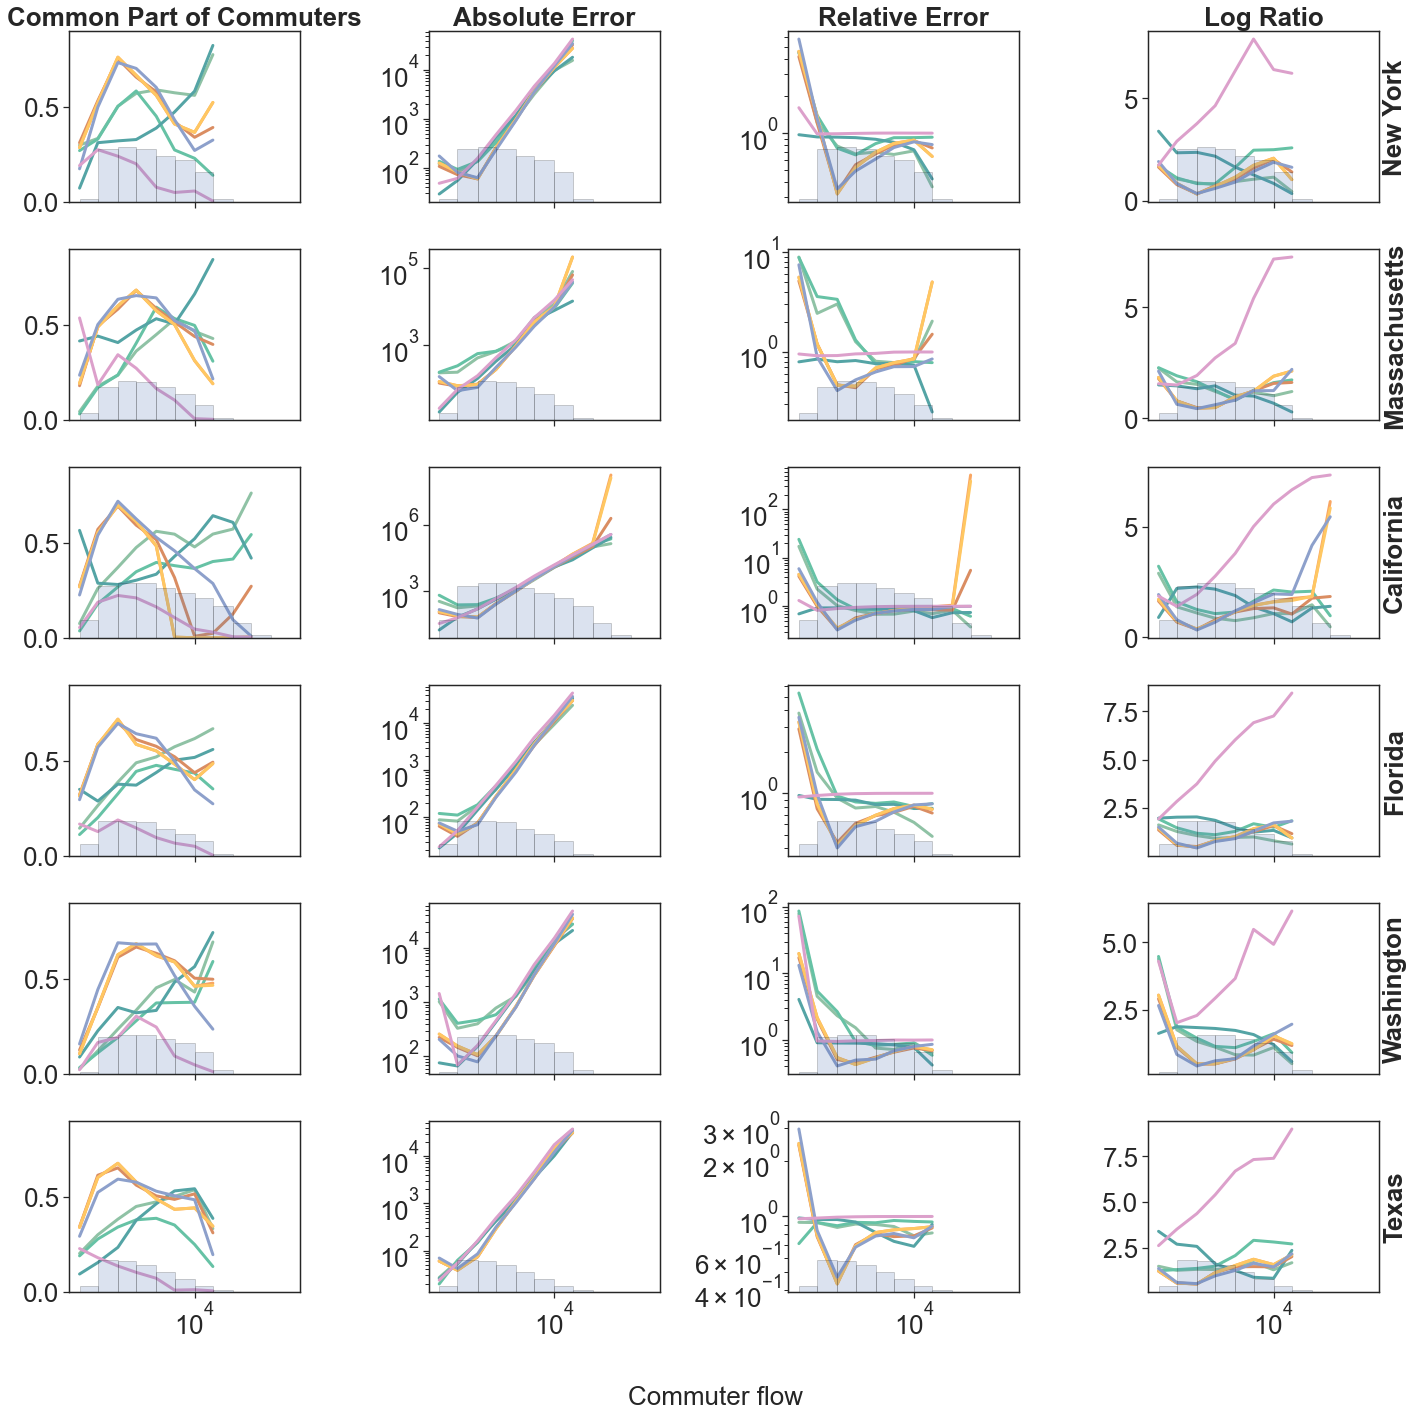

In [24]:
models=['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity']
#models=['BMS Plausible','BMS Ensemble','BMS Predictive','Deep Gravity']
states=['New York','Massachusetts','California','Florida','Washington','Texas']
metrics=['CPC','AbsErr','RE','LogRatio']
windows=[10,30,100,300,1e3,3e3,1e4,3e4,1e5,3e5,1e6,3e6]
colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
fig, axs = plt.subplots(len(states),len(metrics),figsize=size,sharex='col')
for i,m in enumerate(metrics):
    for j,s in enumerate(states):
        # Get de value for each model
        data=scatter_models_C_final_mod[s]
        for l,model in enumerate(models):
            #print(m)
            res=[]
            bar_values=[]
            num_points=[]
            for k in range(0,len(windows)-1):
                # Select flows in range
                #print(windows[k],windows[k+1])
                if l==0: num_points.append(len([point for point in data['test'] if windows[k]<point<windows[k+1]]))
                if model=='Deep Gravity':
                    aux=metric_functions[i](data['testDG'],data['Deep Gravity'],windows[k],windows[k+1])
                else:
                    aux=metric_functions[i](data['test'],data[model],windows[k],windows[k+1])
                if m=='CPC':
                    res.append(aux)
                    if j==0:
                        axs[j,i].set_title('Common Part of Commuters', fontweight="bold")
                    axs[j,i].set_ylim([0,0.9])
                else:
                    res.append(np.median(aux))
                if m!='CPC':
                    bar_values.append(aux)
            #print(res)
            axs[j,i].plot(windows[:len(res)],res, color=colors[l],lw=3.)
            """if m!='CPC':
                w=[5,10,40,60,100,500,1000,5000,10000,50000,1e5]
                box_dict=axs[j,i].boxplot(bar_values,positions=windows[:len(bar_values)],widths=w[:len(bar_values)],showfliers=False,patch_artist=True)
                for item in ['boxes', 'fliers']:
                    for sub_item in box_dict[item]:
                        plt.setp(sub_item, color=colors[l])
                for item in ['medians']:
                    for sub_item in box_dict[item]:
                        plt.setp(sub_item, color='black')
                for item in ['means']:
                    for sub_item in box_dict[item]:
                        sub_item.set_color('black')
                # whiskers and caps have to be treated separately since there are two of each for each plot
                for item in ['whiskers', 'caps']:
                    for sub_items in zip(box_dict[item][::2],box_dict[item][1::2]):
                        plt.setp(sub_items, color=colors[l])"""
            axs[j,i].set_xscale('log')
            if i==len(metrics)-1:
                axs[j,i].set_ylabel(s, fontweight="bold")
                axs[j,i].yaxis.set_label_position("right")
                #axs[j,i].yaxis.tick_right()
            if j==0 and m=='RE':
                axs[j,i].set_title('Relative Error', fontweight="bold")
            elif j==0 and m=='LogRatio':
                axs[j,i].set_title('Log Ratio', fontweight="bold")
            elif j==0 and m=='AbsErr':
                axs[j,i].set_title('Absolute Error', fontweight="bold")
            if m=='AbsErr' or m=='RE':
                axs[j,i].set_yscale('log')
            if l==0:
                #print(windows[:len(res)], num_points, np.diff(windows[:len(res)]))
                #print(len(windows[:len(res)]), len(num_points), len(np.diff(windows[:len(res)+1])))
                tx = axs[j,i].twinx()
                tx.bar(windows[:len(res)], num_points, log=True,ec="k", align="edge", alpha=0.2, width=np.diff(windows[:len(res)+1]))
                tx.set_ylim([0,1e10])
                tx.set_xticks([])
                tx.set_yticks([])
fig.supxlabel('Commuter flow',va='baseline')
plt.tight_layout()
fig.show()
fig.savefig('./Plots/week2_metrics_windows.pdf',format='pdf', bbox_inches='tight', dpi=300)

H 132.7992145891433 3 4 (0.001, 100000.0) 831.8555456630443
I 167.32094634655198 6 7 (0.001, 100000.0) 1296.7509272320171
J 186.29437114765818 6 7 (0.001, 100000.0) 1652.2114081079956
K 122.73778440097858 4 5 (0.001, 100000.0) 1013.1139816429632
L 209.64339598508263 6 7 (0.001, 100000.0) 1589.5420909719624
M 85.37859915407091 3 4 (0.001, 100000.0) 714.2840465191682
N 0.5923075114116758 6 7 (1e-05, 500.0) 1.9077556779692846
O 0.5411429205702779 6 7 (1e-05, 500.0) 1.773352077533753
P 0.59290681703567 5 6 (1e-05, 500.0) 1.7050820229804324
Q 0.5927609905686708 3 4 (1e-05, 500.0) 1.7001350560279924
R 0.5842075207521541 3 4 (1e-05, 500.0) 2.3827829867629737
S 0.5997327609227683 4 5 (1e-05, 500.0) 1.794781514897733
T 0.6527221197281841 6 7 (-0.339850171276081, 7.137533561727999) 2.24587082284137
U 0.5826603211067962 6 7 (-0.3398567829191918, 7.137533876568146) 2.2168013510284874
V 0.668255599392571 3 4 (-0.3398653152526994, 7.137534282869742) 2.4122546712411688
W 0.6675577721590893 3 4 (-0.33

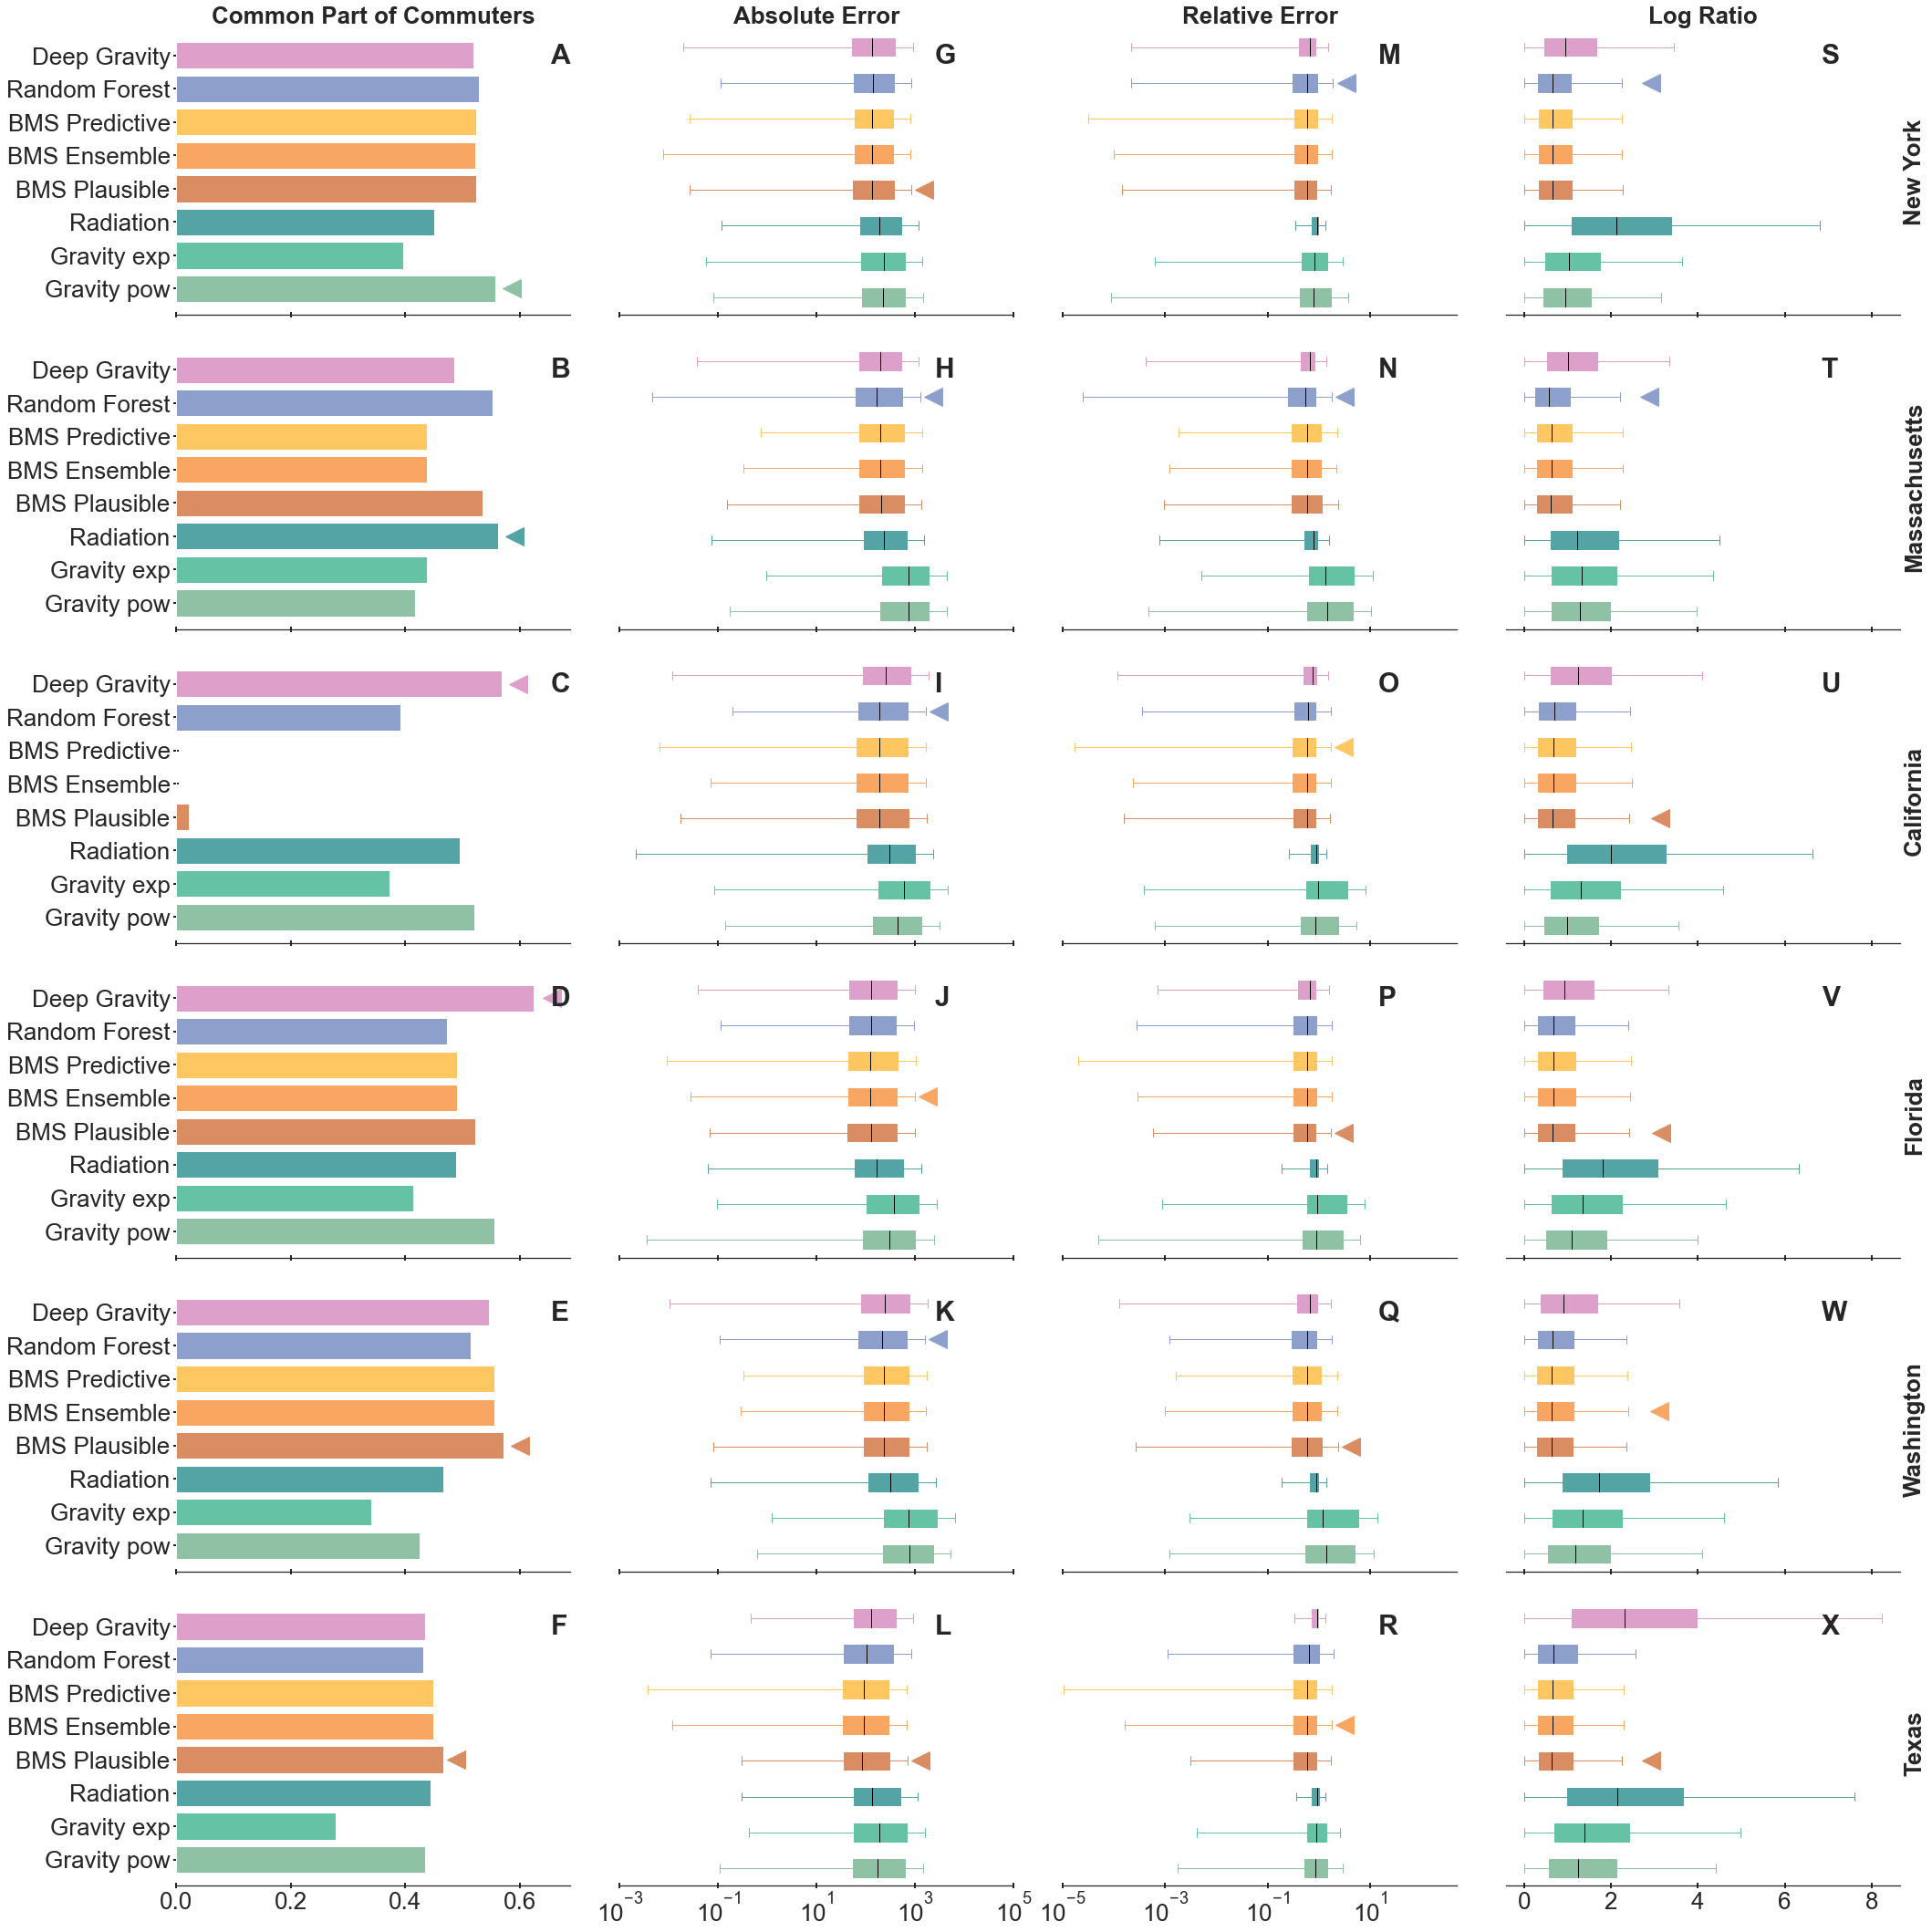

In [95]:
color_dict=p.color_dict
chars='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
SMALL_SIZE = 26
MEDIUM_SIZE = 26
BIGGER_SIZE = 26
def metrics_model_state_h_boxplot(_dict,metric,model,state,size=(30, 30),name=None):
    import matplotlib.cm as cm
    
    SMALL_SIZE = 26
    MEDIUM_SIZE = 26
    BIGGER_SIZE = 26
    #print(_dict,df)
    #print(metric,model)
    colors=[[i/255. for i in color_dict[key]]+[1] for key in model]
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    #sbrn.set(style='ticks', font_scale=2)
    c_count=0
    fig, axs = plt.subplots(len(state),len(metric),figsize=size,sharex='col')
    for i,m in enumerate(metric):
        for j,s in enumerate(state):
            # Get de value for each model
            #print(m)
            data=_dict[s]
            if m=='CPC':
                x=[]
                for mdl in model:
                    try:
                        
                        #cutoff
                    #    if float(df.loc[(mdl,m)][s])<1e5:
                        if mdl=='Deep Gravity':
                            x+=[float(metric_functions[i](data['testDG'],data[mdl],0,1e10))]
                                      
                        else:
                            x+=[float(metric_functions[i](data['test'],data[mdl],0,1e10))]
                    except:
                        x+=[0.]
                # Adding bar plot to final subplot
                ind = np.arange(len(model))
                axs[j,i].barh(ind, x,color=colors)#bar_label(deepcopy(p1), label_type=None)
                if j==0 and m=='CPC':
                    axs[j,i].set_title('Common Part of Commuters', fontweight="bold")
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                axs[j,i].text(.95, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                axs[j,i].plot(max(x)+0.05*max(x),x.index(max(x)), marker="<",color=colors[x.index(max(x))], markersize=20)
                c_count+=1
            else:
                x=[]
                for mod in model:
                    if mdl=='Deep Gravity':
                        x.append(metric_functions[i](data['testDG'],data[mod],0,1e10))
                    else:
                        x.append(metric_functions[i](data['test'],data[mod],0,1e10))
                box_dict=axs[j,i].boxplot(x,labels=model,vert=False,showfliers=False,patch_artist=True)
                for item in ['boxes', 'fliers']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color=color)
                for item in ['medians']:
                    for sub_item,color in zip(box_dict[item], colors):
                        plt.setp(sub_item, color='black')
                for item in ['means']:
                    for sub_item,color in zip(box_dict[item], colors):
                        sub_item.set_color('black')
                # whiskers and caps have to be treated separately since there are two of each for each plot
                for item in ['whiskers', 'caps']:
                    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                        plt.setp(sub_items, color=color)
                if i==len(metric)-1:
                    axs[j,i].set_ylabel(s, fontweight="bold")
                    axs[j,i].yaxis.set_label_position("right")
                    #axs[j,i].yaxis.tick_right()
                if j==0 and m=='RE':
                    axs[j,i].set_title('Relative Error', fontweight="bold")
                elif j==0 and m=='LogRatio':
                    axs[j,i].set_title('Log Ratio', fontweight="bold")
                elif j==0 and m=='AbsErr':
                    axs[j,i].set_title('Absolute Error', fontweight="bold")
                if i!=0:
                    axs[j,i].set_yticks([])
                ind = np.arange(len(model))+1
                if i==0: axs[j,i].set_yticks(ind, labels=model)
                axs[j,i].spines.right.set_visible(False)
                axs[j,i].spines.top.set_visible(False)
                axs[j,i].spines.left.set_visible(False)
                axs[j,i].tick_params(direction='inout', width=2)
                if m=='RE':
                    axs[j,i].set_xlim([1e-5,5e2])
                if m=='AbsErr':
                    axs[j,i].set_xlim([1e-3,1e5])
                    
                #    axs[j,i].text(.1, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #elif m=='LogRatio':
                #    axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                #else:
                axs[j,i].text(.8, .95,chars[c_count], ha='left', va='top',size=30, transform=axs[j,i].transAxes, weight='bold')
                c_count+=1
                if m=='RE' or m=='AbsErr':
                    axs[j,i].set_xscale('log')
                high_median=1e10
                high_model=0
                for k,mod in enumerate(model):
                    #print([k.get_xdata() for k in box_dict['caps']])
                    #print(box_dict)
                    if box_dict['medians'][k].get_xdata()[0]<high_median:
                        high_median=box_dict['medians'][k].get_xdata()[0]
                        high_model=k
                        high_model_y=round(box_dict['medians'][k].get_ydata()[0])
                        high_model_caps=box_dict['caps'][2*k+1].get_xdata()[0]
                        x_lims=axs[j,i].get_xlim()
                print(chars[c_count],high_median,high_model,high_model_y,x_lims,high_model_caps)
                #axs[j,i].plot(high_model_caps +0.05*high_model_caps,high_model_y, marker="^",transform=axs[j,i].get_yaxis_transform(),color=colors[high_model], markersize=20)
                if m=='RE' or m=='AbsErr':
                    x_marker=high_model_caps +0.8*high_model_caps
                else:
                    x_marker=high_model_caps +0.3*high_model_caps
                axs[j,i].plot(x_marker,high_model_y, marker="<",color=colors[high_model], markersize=20)
                
    plt.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf')
    fig.show()
    
    #return fig
#p.metrics_model_state_h(df_C_final,['CPC','RMSE','RE','LR'],['Gravity pow','Gravity exp','Radiation','BMS Best','BMS Ensemble','BMS Predictive','Random Forest'],states) #a['NewYork','Massachusetts','Florida','Washington','Texas'])
metrics_model_state_h_boxplot(scatter_models_C_final_mod,['CPC','AbsErr','RE','LogRatio'],['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],states,name='./Plots/week2_error_boxplot.pdf')

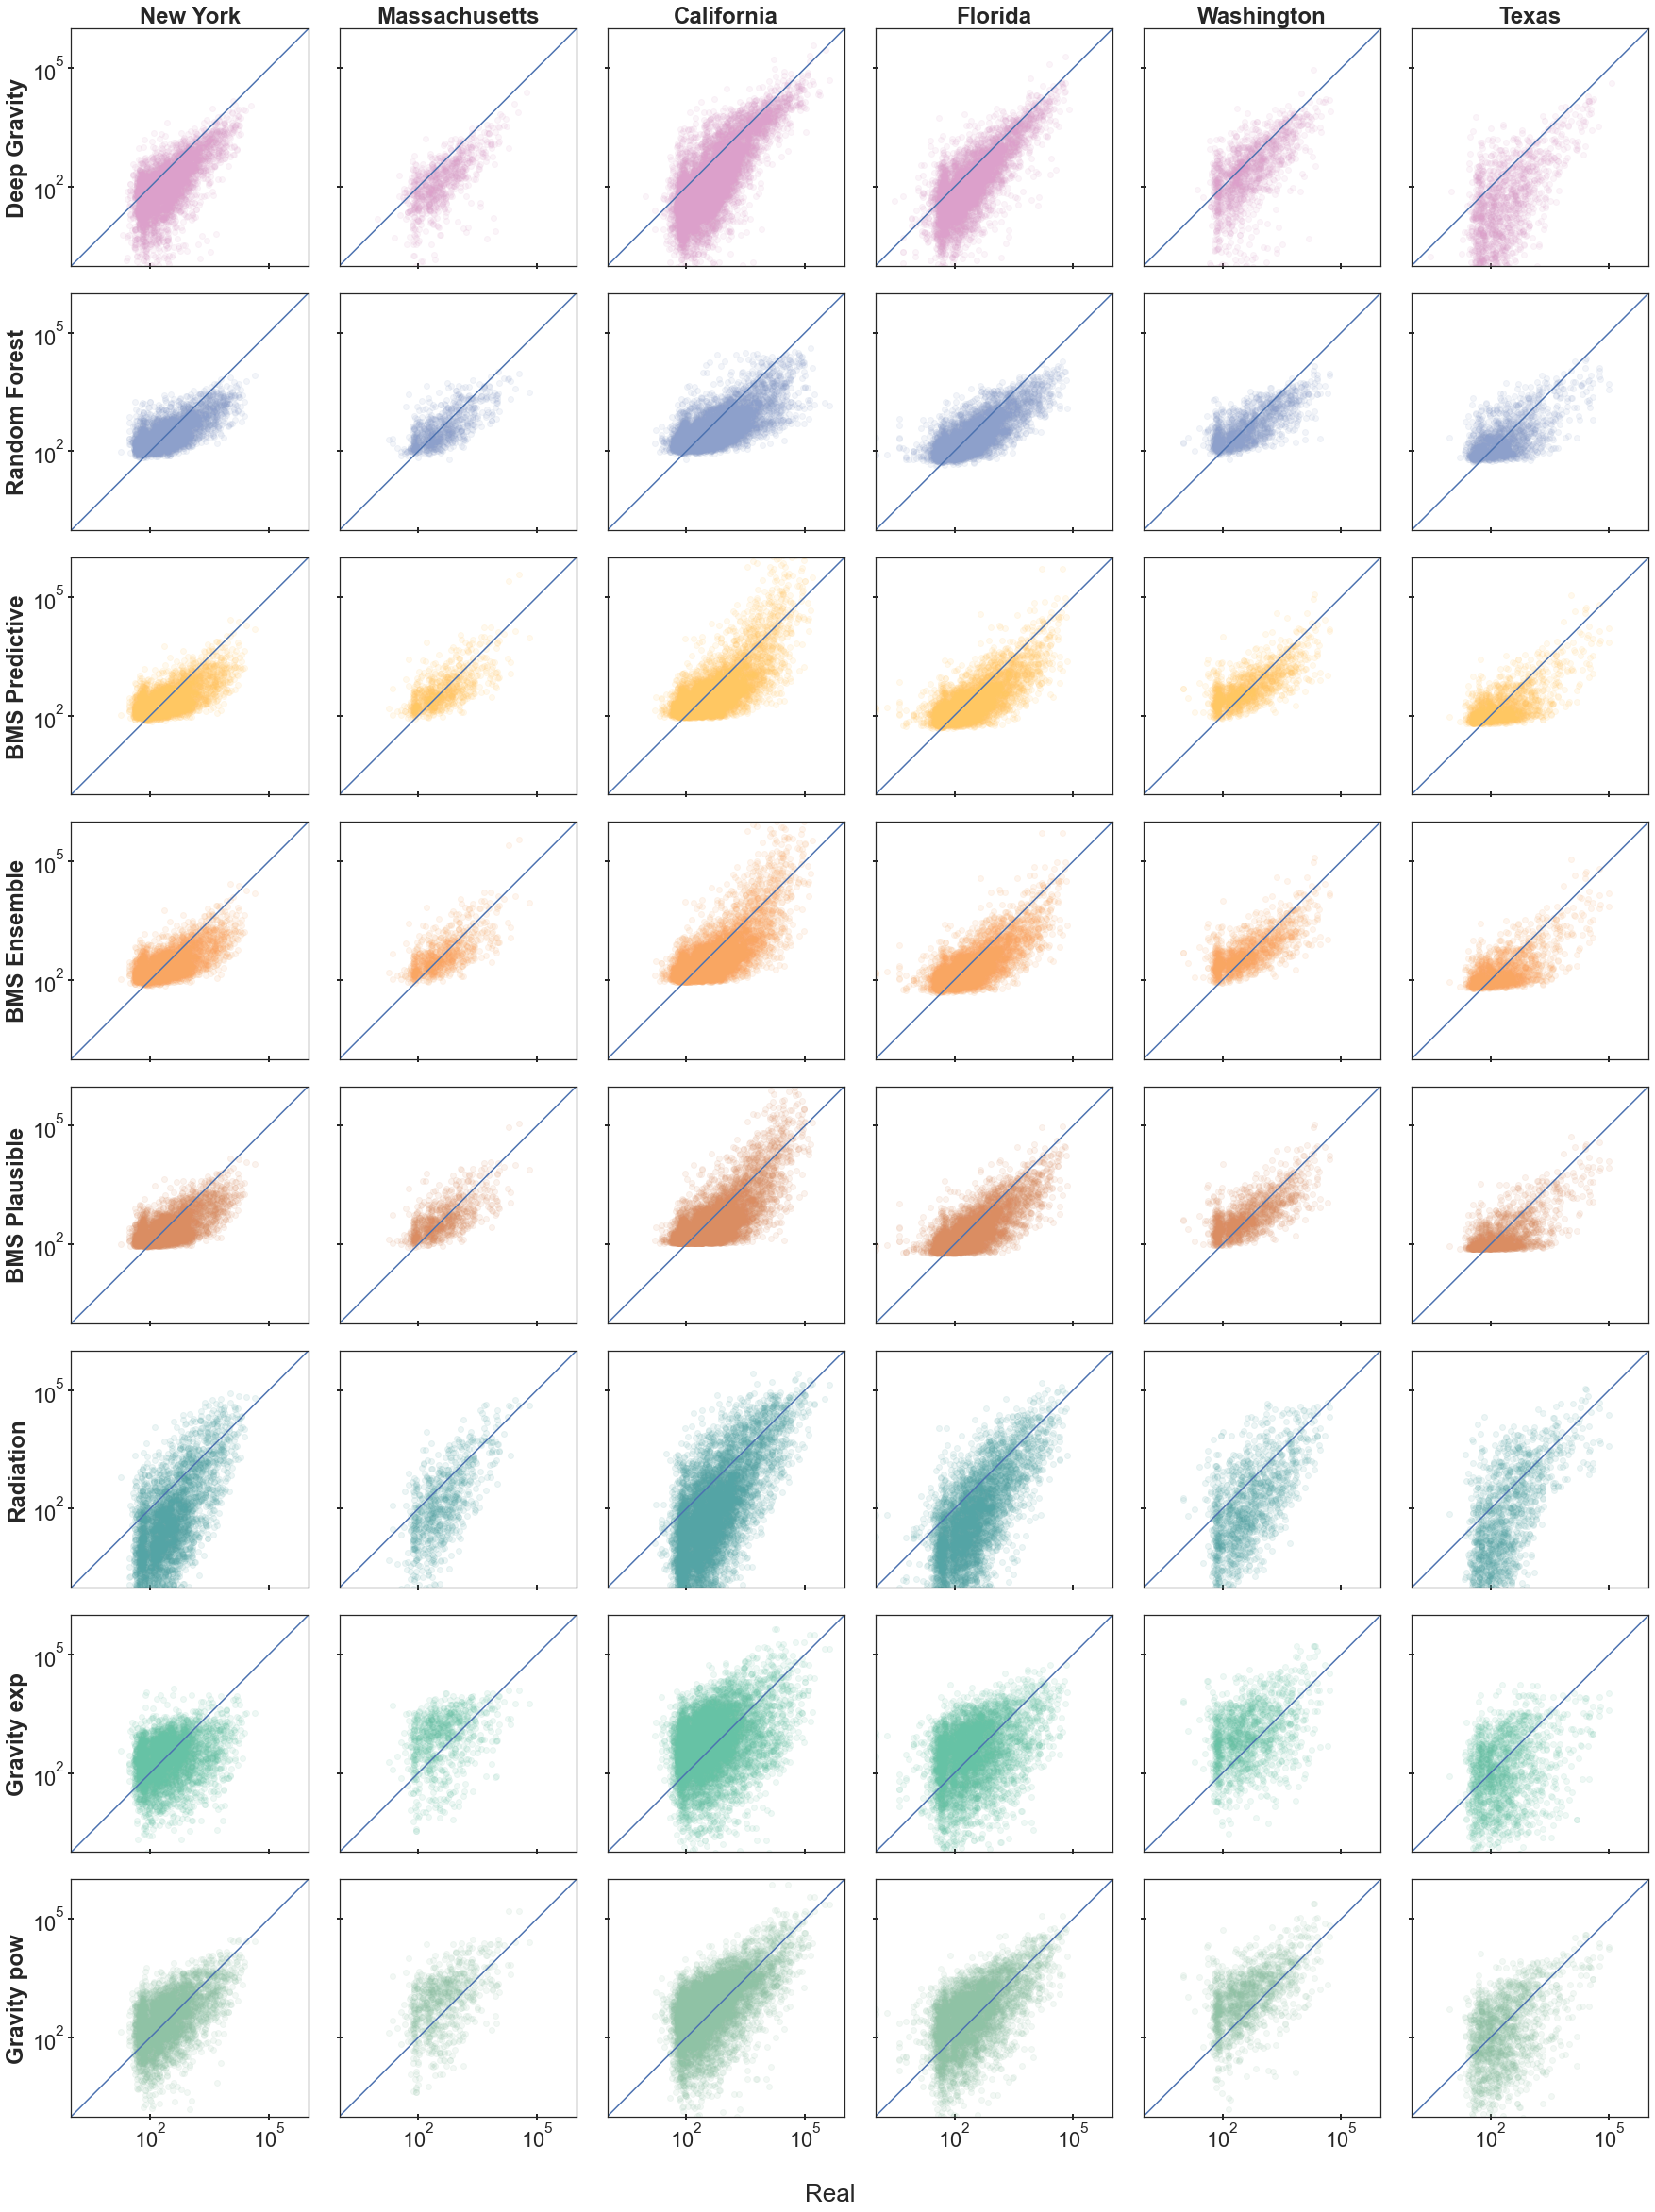

In [96]:
def predictions_state(_dict,mode,models=None,lims=None,list_ticks=None,name=None):
    import matplotlib.cm as cm
    import matplotlib.gridspec as gs
    
    if mode=='A': colors = cm.autumn(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='B': colors = cm.winter(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    if mode=='C': colors = cm.cool(np.linspace(0, 1, len(list(_dict[list(_dict.keys())[0]].keys()))))
    colors=[[i/255. for i in color_dict[key]]+[1] for key in models]
    colors=colors[::-1]
    #SMALL_SIZE = 26
    #MEDIUM_SIZE = 26
    #BIGGER_SIZE = 26
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('font', family='Arial')
    plt.rcParams['font.family'] = 'Arial'
    sbrn.set(style='ticks', font_scale=2)
    #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)
    #plt.gca().set_aspect('equal')
    fist_state=list(_dict.keys())[0]
    if models==None:
        models=[ k for k in _dict[fist_state].keys() if k!='test']
    fig, axs = plt.subplots(len(models),len(_dict),figsize=(25,33))#,sharey='col',sharex='col')
    mpl.rc('font', family='arial')
    sbrn.set(style='ticks', font_scale=2)
    fig.supxlabel('Real',va='baseline')
    g = gs.GridSpec(6,8)
    g.update(wspace=2.0, hspace=0.3)
    c_count=0
    for i,m in enumerate(models[::-1]):
        
        if m=='test': continue
        #fig, axs = plt.subplots(1,len(_dict),figsize=(25, 5),sharey=True)#,sharex=True)
        alpha=1.
        #colors = cm.rainbow(np.linspace(0, 1, len(_dict[state])))
        for j,state in enumerate(_dict.keys()):
            t='test'
            if m=='Deep Gravity':
                t='testDG'
            axs[i,j].scatter(_dict[state][t], _dict[state][m],label=m, alpha=0.1,c=[colors[i]])#bar_label(deepcopy(p1), label_type=None)
            if j==0: axs[i,j].set_ylabel(m, fontweight="bold")
            if i==0:
                axs[i,j].set_title(state, fontweight="bold")
            axs[i,j].tick_params(direction='inout', width=2)

            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            ratio = 1.0
            alpha=alpha-0.1
        #fig.legend(loc=5)
            xleft, xright = axs[i,j].get_xlim()
            ybottom, ytop = axs[i,j].get_ylim()
            minimum = np.min((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
            maximum = np.max((axs[i,j].get_xlim(),axs[i,j].get_ylim()))
        #ax.set_xlim(minimum*1.2,maximum*1.2)
        #ax.set_ylim(minimum*1.2,maximum*1.2)
        #axs.plot((xleft, xright), (ybottom,ytop))
            axs[i,j].plot(lims, lims)
            axs[i,j].tick_params(axis = 'both')
            #axs[i,j].xticks([])
            if list_ticks!=None:
                axs[i,j].set_xticks(list_ticks)
                axs[i,j].set_yticks(list_ticks)
            if j>0: axs[i,j].set_yticklabels([])
            if i<len(models)-1: axs[i,j].set_xticklabels([])
            axs[i,j].set_xlim(lims)
            axs[i,j].set_ylim(lims)
            axs[i,j].set(adjustable='box', aspect='equal')
            c_count+=1
        #plt.tight_layout(h_pad=0.3,w_pad=0.3)
    
    fig.tight_layout()
    if name!=None:
        fig.savefig(name,format='pdf')
    fig.show()
    #return fig
predictions_state(scatter_models_C_final_mod,'C',models=['Gravity pow','Gravity exp','Radiation','BMS Plausible','BMS Ensemble','BMS Predictive','Random Forest','Deep Gravity'],
                 lims=(1.,1e6),list_ticks=[1e-1,1e2,1e5],name='./Plots/week2_scatter_plot.pdf')